In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data=pd.merge(city_data,ride_data,on="city",how="outer")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

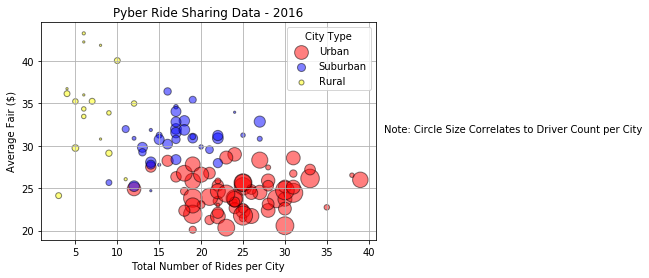

In [2]:
# Obtain the x and y coordinates for each of the three city types
Urban_df=combined_data.loc[combined_data["type"]=="Urban",["city","ride_id","fare","driver_count"]]
Suburban_df=combined_data.loc[combined_data["type"]=="Suburban",["city","ride_id","fare","driver_count"]]
Rural_df=combined_data.loc[combined_data["type"]=="Rural",["city","ride_id","fare","driver_count"]]

Urban_rides=Urban_df.groupby("city").count()
Urban_rides_mean=Urban_df.groupby("city").mean()

Suburban_rides=Suburban_df.groupby("city").count()
Suburban_rides_mean=Suburban_df.groupby("city").mean()

Rural_rides=Rural_df.groupby("city").count()
Rural_rides_mean=Rural_df.groupby("city").mean()


# Build the scatter plots for each city types
plt.scatter(Urban_rides["ride_id"], Urban_rides_mean["fare"], marker="o", facecolors="red",
            s=Urban_rides_mean["driver_count"]*5, edgecolors="black", alpha=0.5, label='Urban')
plt.scatter(Suburban_rides["ride_id"], Suburban_rides_mean["fare"], marker="o", facecolors="blue",
            s=Suburban_rides_mean["driver_count"]*5, edgecolors="black", alpha=0.5, label='Suburban')
plt.scatter(Rural_rides["ride_id"], Rural_rides_mean["fare"], marker="o", facecolors="yellow",
            s=Rural_rides_mean["driver_count"]*5, edgecolors="black", alpha=0.5, label='Rural')

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data - 2016")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fair ($)")
plt.grid()

# Create a legend
plt.legend(loc="best", title="City Type")

# Incorporate a text label regarding circle size
plt.gcf().text(.92, 0.5, "Note: Circle Size Correlates to Driver Count per City", fontsize=10)

# Save Figure

plt.savefig("../Images/Bubble_Plot.png")
# Show plot
plt.show()

## Total Fares by City Type

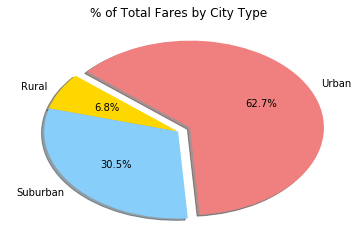

In [3]:
# Calculate Type Percents
Total_fares_df=combined_data.groupby("type").sum()
Total_fares_df["percent"]=(Total_fares_df["fare"]/combined_data["fare"].sum())*100
Total_fares_df=Total_fares_df.reset_index(drop=False)

# Build Pie Chart
explode=[0,0,0.1]
colors=['gold', 'lightskyblue', 'lightcoral']
plt.title("% of Total Fares by City Type")
plt.pie(Total_fares_df["percent"],explode=explode,labels=Total_fares_df["type"],
        autopct="%1.1f%%", shadow=True,colors=colors, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

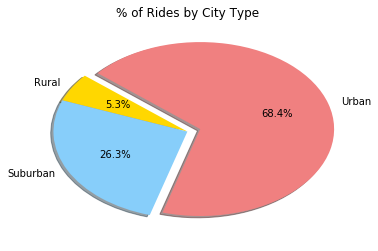

In [4]:
# Calculate Rides Percents
Total_rides_df=combined_data.groupby("type").count()
Total_rides_df["percent"]=(Total_rides_df["ride_id"]/combined_data["ride_id"].count())*100
Total_rides_df=Total_rides_df.reset_index(drop=False)

# Build Pie Chart
explode=[0,0,0.1]
plt.title("% of Rides by City Type")
plt.pie(Total_rides_df["percent"],explode=explode,labels=Total_rides_df["type"], autopct="%1.1f%%",
        shadow=True, colors=colors, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

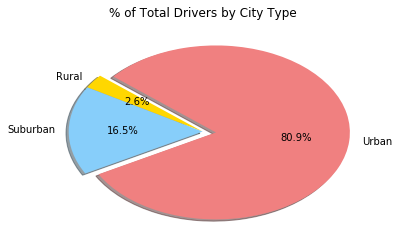

In [5]:
# Calculate Rides Percents
Total_drivers_df=combined_data.groupby(["type","city"]).mean()
Total_drivers_df=Total_drivers_df.reset_index(drop=False)
Total_drivers_df=Total_drivers_df.groupby("type").sum()
Total_drivers_df["percent"]=(Total_drivers_df["driver_count"]/Total_drivers_df["driver_count"].sum())*100
Total_drivers_df=Total_drivers_df.reset_index(drop=False)

# Build Pie Chart
explode=[0,0,0.1]
plt.title("% of Total Drivers by City Type")
plt.pie(Total_drivers_df["percent"],explode=explode,labels=Total_drivers_df["type"], autopct="%1.1f%%",
        shadow=True, colors=colors, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Rides.png")

# Show Figure
plt.show()

Observable trends based on the data

- There are the most pyber drivers in urban areas
- Rural pyber drivers make more fares per driver then either rural or suburban
- The more rural and fewer rides in the city the higher the average fare
